In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'FigS8_data.xlsx'
xl = pd.ExcelFile(filename)
print(xl.sheet_names)

['figS8_raw', 'atc', 'cm', 'kan', 'iptg']


In [3]:
# import GFP (background subtracted) -- suppressed (cm + atc)
suppressed = xl.parse('atc', index_col = 0, header = 0).reset_index()
suppressed

,index,rep1,rep2,rep3,rep4,rep5,rep6
0,Msp1,380.083333,233.083333,15.083333,35.083333,46.083333,114.083333
1,Msp2,12.083333,11.083333,24.083333,9.083333,21.083333,14.083333
2,Msp3,2382.083333,4299.083333,5377.083333,3365.083333,2407.083333,3071.083333
3,Msp4,258.083333,238.083333,237.083333,368.083333,322.083333,330.083333
4,Msp5,641.083333,542.083333,499.083333,329.083333,353.083333,671.083333
5,Msp6,32.083333,13.083333,9.083333,10.083333,9.083333,72.083333


In [4]:
# import GFP (background subtracted) -- resting (cm)
resting = xl.parse('cm', index_col = 0, header = 0).reset_index()
resting

,index,rep1,rep2,rep3,rep4,rep5,rep6
0,Msp1,109.083333,95.083333,14.083333,30.083333,20.083333,71.083333
1,Msp2,5.083333,8.083333,16.083333,5.083333,6.083333,4.083333
2,Msp3,1360.083333,2204.083333,2312.083333,1471.083333,1205.083333,2299.083333
3,Msp4,4194.083333,3957.083333,3949.083333,4111.083333,3465.083333,2992.083333
4,Msp5,312.083333,286.083333,227.083333,232.083333,181.083333,411.083333
5,Msp6,9.083333,5.083333,7.083333,8.083333,4.083333,48.083333


In [5]:
# import GFP (background subtracted) -- enriched (cm + kan)
enriched = xl.parse('kan', index_col = 0, header = 0).reset_index()
enriched

,index,rep1,rep2,rep3,rep4,rep5,rep6
0,Msp1,21457.083333,14808.083333,5697.083333,7052.083333,9065.083333,8106.083333
1,Msp2,2962.083333,6909.083333,4651.083333,4398.083333,6711.083333,4695.083333
2,Msp3,19441.083333,18453.083333,17718.083333,19900.083333,15581.083333,16138.083333
3,Msp4,10628.083333,11745.083333,12752.083333,13907.083333,13742.083333,13473.083333
4,Msp5,17920.083333,25197.083333,22118.083333,25398.083333,22291.083333,18088.083333
5,Msp6,18162.083333,1599.083333,1180.083333,1076.083333,1101.083333,1490.083333


In [6]:
# import GFP (background subtracted) -- hyper (cm + kan + iptg)
hyper = xl.parse('iptg', index_col = 0, header = 0).reset_index()
hyper

,index,rep1,rep2,rep3,rep4,rep5,rep6
0,Msp1,19648.083333,16474.083333,10132.083333,11096.083333,12885.083333,11778.083333
1,Msp2,10687.083333,10539.083333,9859.083333,10430.083333,10261.083333,4128.083333
2,Msp3,26598.083333,24222.083333,21129.083333,25378.083333,21177.083333,21505.083333
3,Msp4,19640.083333,18996.083333,19125.083333,19656.083333,18736.083333,18491.083333
4,Msp5,22448.083333,26193.083333,32759.083333,27527.083333,26305.083333,23198.083333
5,Msp6,13896.083333,3589.083333,2951.083333,3097.083333,2756.083333,2815.083333


In [7]:
# melt each dataframe and insert a column with media info 
suppressed_long = pd.melt(suppressed, id_vars = 'index', 
                          value_vars = ['rep1','rep2', 'rep3','rep4','rep5','rep6'], 
                          var_name = 'replicate', value_name = 'GFP')
suppressed_long.insert(1, 'media', np.array(['atc']*len(suppressed_long)))
suppressed_long

,index,media,replicate,GFP
0,Msp1,atc,rep1,380.083333
1,Msp2,atc,rep1,12.083333
2,Msp3,atc,rep1,2382.083333
3,Msp4,atc,rep1,258.083333
4,Msp5,atc,rep1,641.083333
5,Msp6,atc,rep1,32.083333
6,Msp1,atc,rep2,233.083333
7,Msp2,atc,rep2,11.083333
8,Msp3,atc,rep2,4299.083333
9,Msp4,atc,rep2,238.083333


In [8]:
# melt each dataframe and insert a column with media info 
resting_long = pd.melt(resting, id_vars = 'index', 
                          value_vars = ['rep1','rep2', 'rep3','rep4','rep5','rep6'], 
                          var_name = 'replicate', value_name = 'GFP')
resting_long.insert(1, 'media', np.array(['cm']*len(resting_long)))
resting_long

,index,media,replicate,GFP
0,Msp1,cm,rep1,109.083333
1,Msp2,cm,rep1,5.083333
2,Msp3,cm,rep1,1360.083333
3,Msp4,cm,rep1,4194.083333
4,Msp5,cm,rep1,312.083333
5,Msp6,cm,rep1,9.083333
6,Msp1,cm,rep2,95.083333
7,Msp2,cm,rep2,8.083333
8,Msp3,cm,rep2,2204.083333
9,Msp4,cm,rep2,3957.083333


In [9]:
# melt each dataframe and insert a column with media info 
enriched_long = pd.melt(enriched, id_vars = 'index', 
                          value_vars = ['rep1','rep2', 'rep3','rep4','rep5','rep6'], 
                          var_name = 'replicate', value_name = 'GFP')
enriched_long.insert(1, 'media', np.array(['kan']*len(enriched_long)))
enriched_long

,index,media,replicate,GFP
0,Msp1,kan,rep1,21457.083333
1,Msp2,kan,rep1,2962.083333
2,Msp3,kan,rep1,19441.083333
3,Msp4,kan,rep1,10628.083333
4,Msp5,kan,rep1,17920.083333
5,Msp6,kan,rep1,18162.083333
6,Msp1,kan,rep2,14808.083333
7,Msp2,kan,rep2,6909.083333
8,Msp3,kan,rep2,18453.083333
9,Msp4,kan,rep2,11745.083333


In [10]:
# melt each dataframe and insert a column with media info 
hyper_long = pd.melt(hyper, id_vars = 'index', 
                          value_vars = ['rep1','rep2', 'rep3','rep4','rep5','rep6'], 
                          var_name = 'replicate', value_name = 'GFP')
hyper_long.insert(1, 'media', np.array(['iptg']*len(hyper_long)))
hyper_long

,index,media,replicate,GFP
0,Msp1,iptg,rep1,19648.083333
1,Msp2,iptg,rep1,10687.083333
2,Msp3,iptg,rep1,26598.083333
3,Msp4,iptg,rep1,19640.083333
4,Msp5,iptg,rep1,22448.083333
5,Msp6,iptg,rep1,13896.083333
6,Msp1,iptg,rep2,16474.083333
7,Msp2,iptg,rep2,10539.083333
8,Msp3,iptg,rep2,24222.083333
9,Msp4,iptg,rep2,18996.083333


In [11]:
# combine the four long dataframes 
final_df = pd.concat([suppressed_long, resting_long, enriched_long, hyper_long])
final_df.rename(columns = {'index':'sample_name'}, inplace = True)
final_df

,sample_name,media,replicate,GFP
0,Msp1,atc,rep1,380.083333
1,Msp2,atc,rep1,12.083333
2,Msp3,atc,rep1,2382.083333
3,Msp4,atc,rep1,258.083333
4,Msp5,atc,rep1,641.083333
...,...,...,...,...
31,Msp2,iptg,rep6,4128.083333
32,Msp3,iptg,rep6,21505.083333
33,Msp4,iptg,rep6,18491.083333
34,Msp5,iptg,rep6,23198.083333


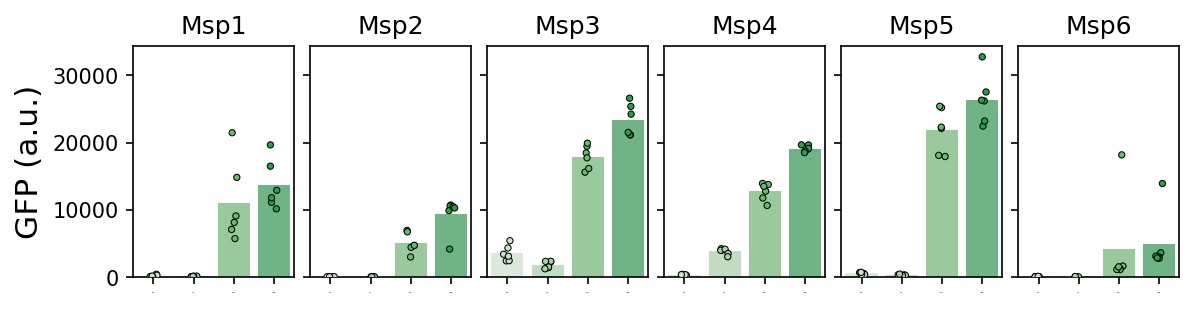

In [12]:
# plot
fig, axes = plt.subplots(1,6, figsize=(9, 2), sharey= True, sharex = True, dpi = 150)
plt.subplots_adjust( wspace=0.1)

df = final_df 
strains = final_df.sample_name.unique()
pal = ['#C8E4C9', '#A2D4A5', '#63BE6B', '#23A349']

for st, ax in zip(strains, axes.flatten()):
    # Draw the bar chart
    b = sns.barplot( data=df[df['sample_name'] == st], x="media", y="GFP", hue = 'media',
        alpha=0.7, errorbar=None, palette = pal,ax = ax)

    # Draw the stripplot
    sns.stripplot(data=df[df['sample_name'] == st], x="media", y="GFP", 
        hue="media", edgecolor="black", linewidth=.5,s = 3,ax=ax,palette = pal)
    
    # Remove the old legend
    # ax.legend_.remove()

    b.axes.set_title(st)
    b.set_ylabel(" ")
    b.set_xlabel(" ")
    b.tick_params(axis='both', which='major', labelsize=10)
    b.tick_params(axis='x', labelsize=0)

axes[0].set_ylabel("GFP (a.u.)", fontsize = 15)
plt.show()